<a href="https://colab.research.google.com/github/sudeep-009/Transport-Demand-Prediction-Regression-Capstone-Project/blob/dev/Copy_of_Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [34]:
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
transport_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Traffic Demand Prediction-Capstone/train_revised.csv')

#**First lets understand the given dataset**

####**Lets explore few rows of our dataset**

In [37]:
pd.concat([transport_df.head(),transport_df.tail()])

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


**Lets see the number of records present in the given dataset**

In [38]:
print('Number of features present in the dataset:{}'.format(transport_df.shape[1]))
print('Number of records present in the dataset:{}'.format(transport_df.shape[0]))

Number of features present in the dataset:10
Number of records present in the dataset:51645


**Features Name present in the dataset**

In [39]:
for i in transport_df.columns:
  print(i)

ride_id
seat_number
payment_method
payment_receipt
travel_date
travel_time
travel_from
travel_to
car_type
max_capacity


**Null Value Detection**

In [40]:
#detecting null values present in any of the columns
transport_df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

**Finding:** There is no null value present in any of the features of the dataset.

In [41]:
#concise summary of the dataset
transport_df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


**Findings:**

1. Two type of payment method.
2. Only 149 days record is available.
3. There are 17 distinct origin.
4. There are 2 type of vehicle.
5. Only one destination Nairobi.
6. Bus is more in number.


**Type, Null Count, Non Null Count, Unique Count of Features present in the dataset**

In [42]:
def info(dataset):
  info_df = pd.DataFrame(columns={'Type','Null Count','Non Null Count','Unique Count'},index=dataset.columns)
  info_df['Type'] = dataset.dtypes
  info_df['Null Count'] = dataset.isnull().sum()
  info_df['Non Null Count'] = len(dataset) - dataset.isnull().sum()
  info_df['Unique Count'] = dataset.nunique()
  return info_df

In [43]:
info(transport_df).T

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
Unique Count,6249,61,2,51645,149,78,17,1,2,2
Null Count,0,0,0,0,0,0,0,0,0,0
Type,int64,object,object,object,object,object,object,object,object,int64
Non Null Count,51645,51645,51645,51645,51645,51645,51645,51645,51645,51645


**Findings:**

1.    No Null Values are  present in the dataset.
2.    Maximum features are of categorical type.
3.    Two types of payment method.
4.    17 Unique Origin.
5.    1 Destination for all Origin
6.    2 Types of Vehicle.

#**EDA and Features Selection**

**Payment,CarType and Maximum Capacity**

In [44]:
#count of unique values
value_count_cols = ['payment_method','car_type','max_capacity']
for value in value_count_cols:
  print(transport_df[value].value_counts())

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64
Bus        31985
shuttle    19660
Name: car_type, dtype: int64
49    31985
11    19660
Name: max_capacity, dtype: int64


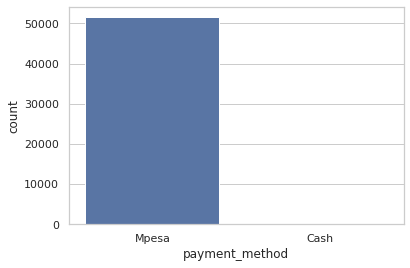

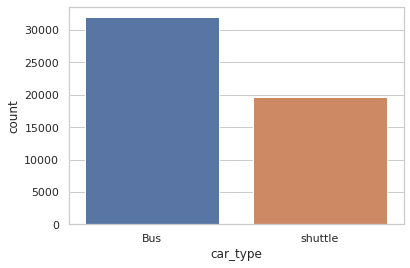

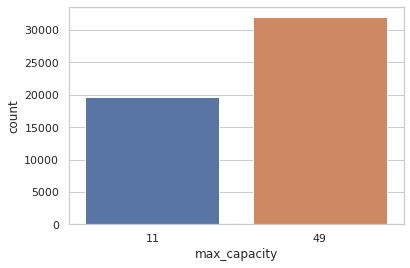

In [45]:
plot_count_cols = ['payment_method','car_type','max_capacity']
for plots in plot_count_cols:
  sns.countplot(transport_df[plots])
  plt.show()

**Findings:**
1. Peoples are highly aware about digital payment.Do not prefer to pay in cash.
2. Count of Bus is more than Shuttle.
3. As almost all the peoples are paying digitally hence we will drop this feature as it is almost constant.

In [46]:
#dropping column payment_method
transport_df.drop('payment_method',axis=1,inplace=True)

**Correlation between max_capacity and car_type**

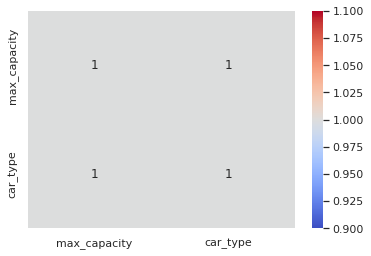

In [47]:
#finding correlation between max capacity and car type
sns.heatmap(transport_df[['max_capacity','car_type']].apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1),cmap='coolwarm',annot=True)

**Finding:** As the two features are completely correlated hence we will drop one of them

In [48]:
#dropping car type from feature list
transport_df.drop('car_type',axis=1,inplace=True)

**Count of Unique Origin**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

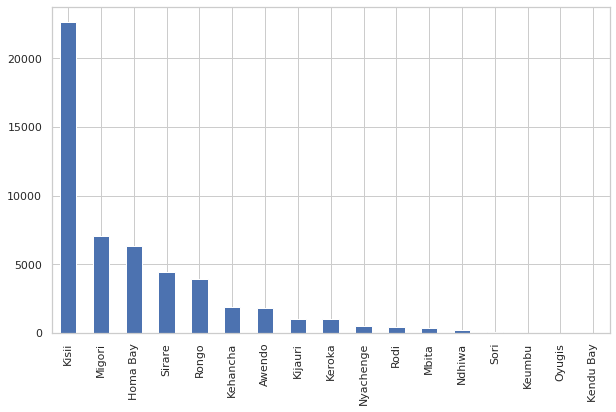

In [49]:
plt.figure(figsize=(10,6))
transport_df['travel_from'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)

**Findings:**
1. Some Origins have negligible impact on demand. Showing very less transit between them and Nairobi
2. Kisii is the most popular Origin. Having frequent availability of transportation vehicle.
3. Plugging less popular origin into one unit.

In [50]:
#plugging less popular origin into one unit called other
modify_origin = {'Nyachenge': 'other', 'Rodi': 'other', 'Mbita': 'other', 'Ndhiwa': 'other', 'Sori': 'other', 'Keumbu': 'other', 'Oyugis': 'other', 'Kendu Bay': 'other' }
transport_df['travel_from'] = transport_df['travel_from'].replace(modify_origin)

In [51]:
transport_df['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'other', 'Rongo',
       'Kijauri', 'Awendo', 'Sirare', 'Kehancha'], dtype=object)

**Travel Time**

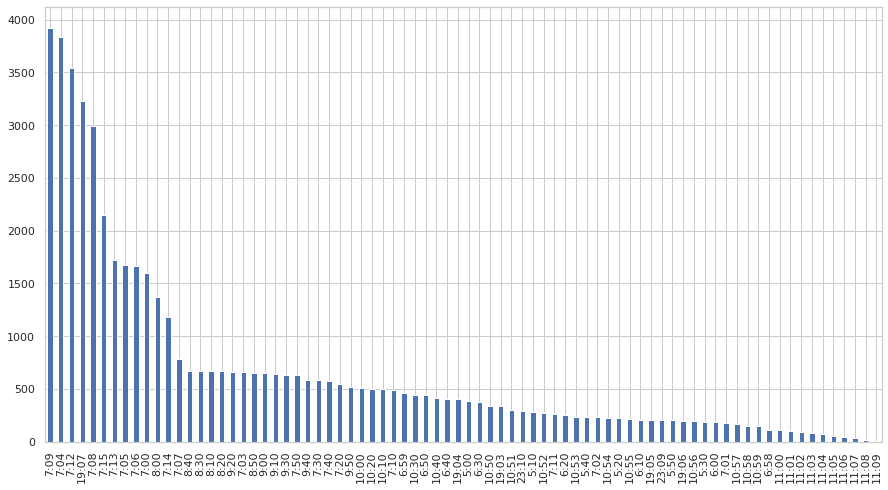

In [52]:
plt.figure(figsize=(15,8))
transport_df['travel_time'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

**Findings:**

1. Count of Public transport vehicle is high during the morning time till 10 am in the morning.
2. There is no public transport during the midnight. 
3. Last availability is at 11:09 pm in the night.

**Dropping of Features**
1. Destination point: As this feature has a constant value i.e Nairobi
2. Payment Receipt: As it is categorical and  all the values are different.

In [53]:
#dropping features
transport_df.drop(['travel_to','payment_receipt'],axis=1,inplace=True)

##**Determining Target Variable:**

Predicting demand of a particular ride means predicting a demand at a particular date and time for a  specific route

Now we can understand Demand here as a number of booking made for each ride. For this we will build a new dataset by grouping the rideId and all other features and then aggregating number of seat booked in a given ride. By doing this we will get out target variable in the form of number of booking for a given at a given time and data for a particular route.

In [215]:
transform_df = transport_df.groupby(['ride_id','travel_from','travel_date','travel_time','max_capacity']).agg({"seat_number": "count"}).reset_index()

In [216]:
transform_df.rename(columns={'seat_number': 'target'},inplace=True)

In [217]:
transform_df.head()

,ride_id,travel_from,travel_date,travel_time,max_capacity,target
0,1442,Migori,17-10-17,7:15,49,1
1,5437,Migori,19-11-17,7:12,49,1
2,5710,Keroka,26-11-17,7:05,49,1
3,5777,Homa Bay,27-11-17,7:10,49,5
4,5778,Migori,27-11-17,7:12,49,31


**Number of duplicate value in the dataset**

In [218]:
transform_df.duplicated( keep='first').sum()

0

**Shape of a transform dataframe**

In [219]:
#shape of transform dataframe
transform_df.shape

(6249, 6)

In [220]:
#concise summary of dataframe
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6249 entries, 0 to 6248
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ride_id       6249 non-null   int64 
 1   travel_from   6249 non-null   object
 2   travel_date   6249 non-null   object
 3   travel_time   6249 non-null   object
 4   max_capacity  6249 non-null   int64 
 5   target        6249 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 293.0+ KB


**Data Cleaning**

In [221]:
#Check if Bookings more than maximum seat.
More_Bookings_less_seat=transform_df[transform_df['max_capacity']<transform_df['target']].index
display(transform_df[transform_df['max_capacity']<transform_df['target']], More_Bookings_less_seat,len(More_Bookings_less_seat))

,ride_id,travel_from,travel_date,travel_time,max_capacity,target
1668,8124,Kisii,13-02-18,7:00,11,12
1922,8454,Sirare,09-01-18,7:00,49,50
1976,8528,Kisii,07-02-18,9:30,11,12
2064,8642,Kisii,05-02-18,10:30,11,12
2073,8651,Kisii,05-02-18,9:10,11,12
2163,8773,Kisii,04-02-18,10:51,11,12
2339,9011,Kisii,31-01-18,9:50,11,12
3639,10689,Kisii,20-12-17,10:00,11,12
3772,10847,Kisii,19-12-17,7:20,11,12
4131,11279,Kisii,14-12-17,10:57,11,12


Int64Index([1668, 1922, 1976, 2064, 2073, 2163, 2339, 3639, 3772, 4131, 4421,
            4666, 5016],
           dtype='int64')

13

##**Feature Engineering**

In [222]:
#date column which will be addition of date column and time column
transform_df['date'] = transform_df['travel_date']+' '+transform_df['travel_time']

In [223]:
def  time_features(df): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_month"]=df["date"].dt.day
  df["hour"]=df["date"].dt.hour
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [224]:
time_features(transform_df)

,ride_id,travel_from,travel_date,travel_time,max_capacity,target,date,day_of_week,day_of_month,hour,is_weekend,year,quarter,month
0,1442,Migori,17-10-17,7:15,49,1,2017-10-17 07:15:00,1,17,7,0,2017,4,10
1,5437,Migori,19-11-17,7:12,49,1,2017-11-19 07:12:00,6,19,7,1,2017,4,11
2,5710,Keroka,26-11-17,7:05,49,1,2017-11-26 07:05:00,6,26,7,1,2017,4,11
3,5777,Homa Bay,27-11-17,7:10,49,5,2017-11-27 07:10:00,0,27,7,0,2017,4,11
4,5778,Migori,27-11-17,7:12,49,31,2017-11-27 07:12:00,0,27,7,0,2017,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,20113,Kisii,07-02-18,7:00,11,9,2018-07-02 07:00:00,0,2,7,0,2018,3,7
6245,20114,Kisii,12-12-17,7:10,49,4,2017-12-12 07:10:00,1,12,7,0,2017,4,12
6246,20115,Kisii,06-12-17,7:10,11,5,2017-06-12 07:10:00,0,12,7,0,2017,2,6
6247,20116,Kisii,27-11-17,7:10,11,1,2017-11-27 07:10:00,0,27,7,0,2017,4,11


In [225]:
#Calculating boarding time in interger type
transform_df['travel_time'] = transform_df['travel_time'].apply(lambda x: x.split(':'))
transform_df['travel_time'] = transform_df['travel_time'].apply(lambda x: int(x[0])*60 + int(x[1]))

In [226]:
transform_df['boarding_time(hr)'] = transform_df['travel_time'].apply(lambda x: round(x/60,2))

**Boarding Period according to boarding time**

In [227]:
#New feature known as boarding period which could be formed with the help of boarding time
transform_df['boarding period'] = transform_df['boarding_time(hr)'].apply(lambda x: 'Morning' if (5<x<=11) else('AfterNoon' if (11<x<=17) else('Evening' if (17<x<=23) else 'Night')))

In [228]:
bcount = dict(transform_df['boarding period'].value_counts())
bcount

{'AfterNoon': 72, 'Evening': 225, 'Morning': 5730, 'Night': 222}

In [229]:
transform_df.head()

,ride_id,travel_from,travel_date,travel_time,max_capacity,target,date,day_of_week,day_of_month,hour,is_weekend,year,quarter,month,boarding_time(hr),boarding period
0,1442,Migori,17-10-17,435,49,1,2017-10-17 07:15:00,1,17,7,0,2017,4,10,7.25,Morning
1,5437,Migori,19-11-17,432,49,1,2017-11-19 07:12:00,6,19,7,1,2017,4,11,7.20,Morning
2,5710,Keroka,26-11-17,425,49,1,2017-11-26 07:05:00,6,26,7,1,2017,4,11,7.08,Morning
3,5777,Homa Bay,27-11-17,430,49,5,2017-11-27 07:10:00,0,27,7,0,2017,4,11,7.17,Morning
4,5778,Migori,27-11-17,432,49,31,2017-11-27 07:12:00,0,27,7,0,2017,4,11,7.20,Morning


**Calculating the distance between each of the origin and destination**

In [230]:
#TIME FEATURES
time_features = ['day_of_week','month','quarter','is_weekend','boarding_time(hr)','day_of_month']

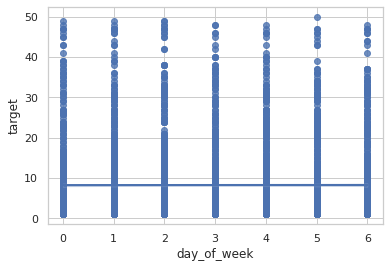

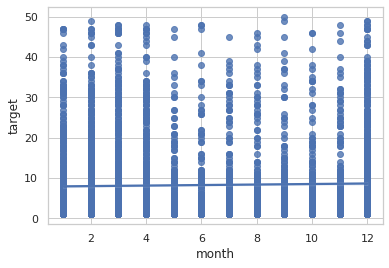

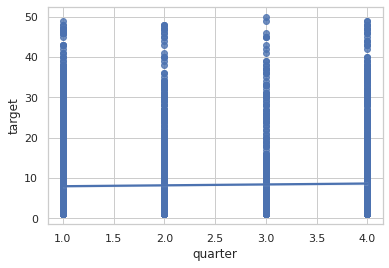

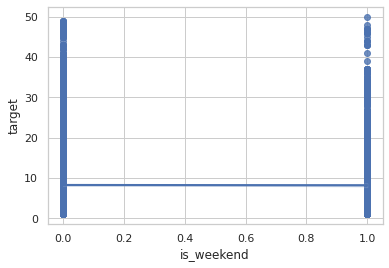

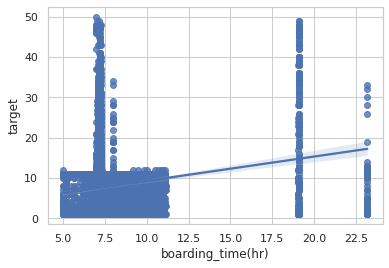

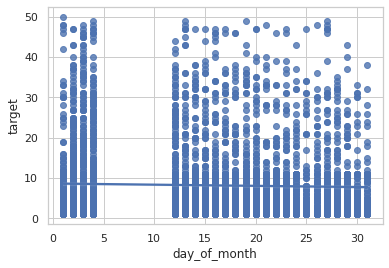

In [231]:
for i in time_features:
  sns.regplot(x=transform_df[i],y=transform_df['target'])
  plt.show()

**Findings:**
1. There is no data available for the peroid of 5-11 of every month. May be because of holiday.
2. There is high avaliability during the morning hours because people move toward their work place during these hours.
3. Demand seems to be very high during the evening and night as the availabitly is very low during these hours.

**Distribution of booking among categorical features**

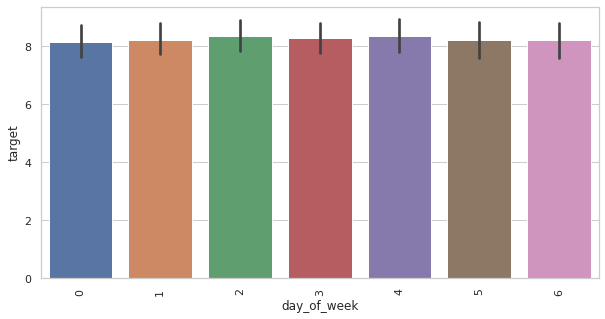

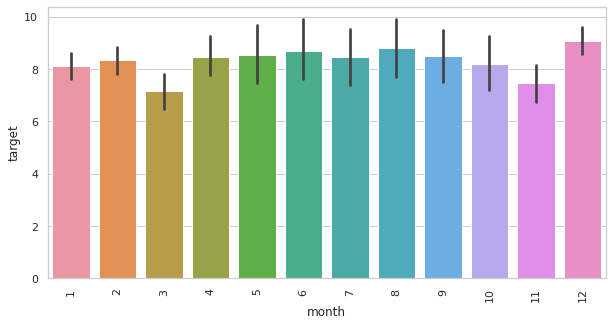

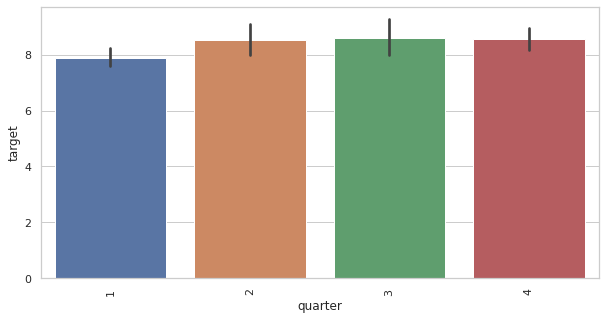

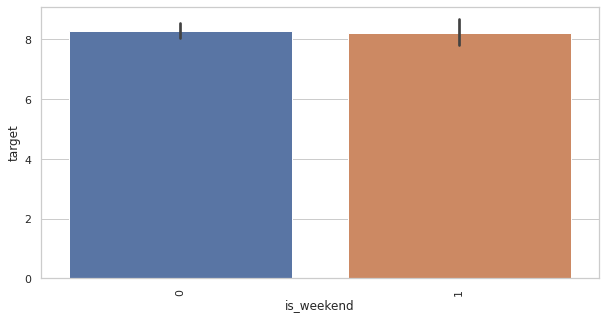

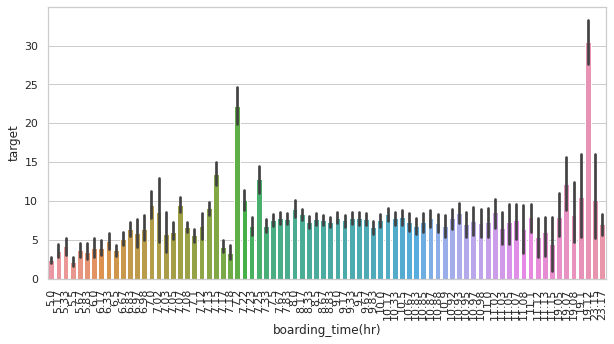

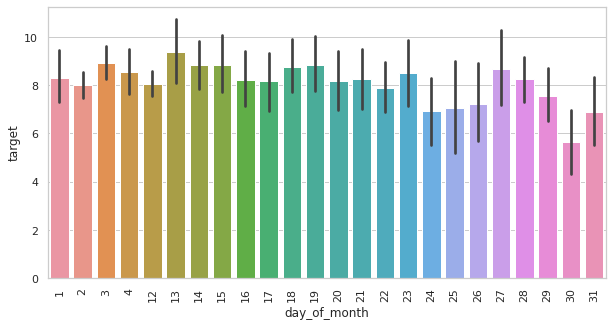

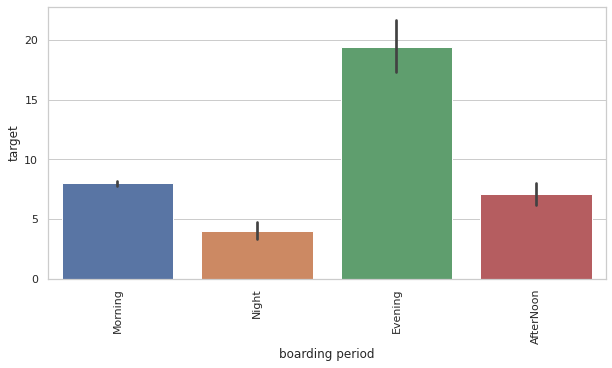

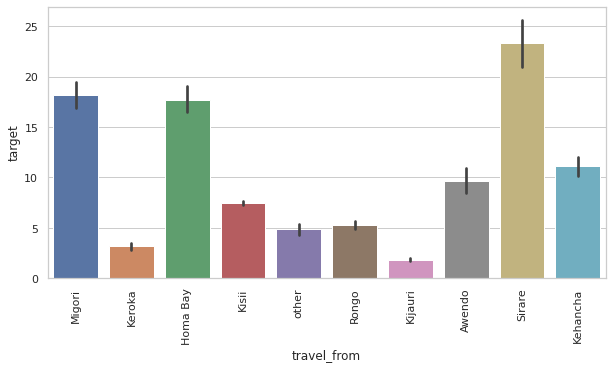

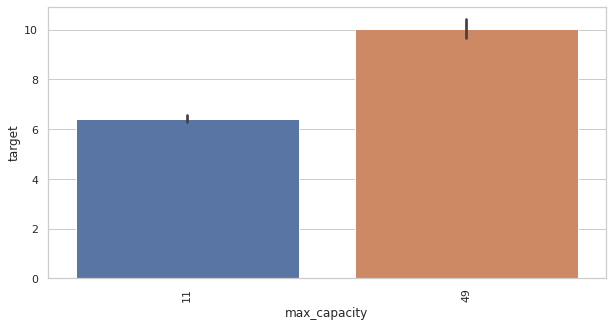

In [232]:
# FEATURES
features = ['day_of_week','month','quarter','is_weekend','boarding_time(hr)','day_of_month','boarding period','travel_from','max_capacity']
for i in features:
  plt.figure(figsize=(10,5))
  sns.barplot(x=transform_df[i],y=transform_df['target'])
  plt.xticks(rotation=90)
  plt.show()

**Findings:**
1. Demand is very high during the evening time as the avaliabilty is low.
2. Also Demand from Sirare, Migori, Homa Bay  and Kehancha is high.

**Dropping features which are not going to be used**

In [233]:
transform_df.columns

Index(['ride_id', 'travel_from', 'travel_date', 'travel_time', 'max_capacity',
       'target', 'date', 'day_of_week', 'day_of_month', 'hour', 'is_weekend',
       'year', 'quarter', 'month', 'boarding_time(hr)', 'boarding period'],
      dtype='object')

In [234]:
final_df = transform_df.copy()
final_df.drop(['ride_id','travel_date','travel_time','date','month','hour','year','boarding_time(hr)','day_of_month','quarter','is_weekend',],axis=1,inplace=True)

In [235]:
final_df.head()

,travel_from,max_capacity,target,day_of_week,boarding period
0,Migori,49,1,1,Morning
1,Migori,49,1,6,Morning
2,Keroka,49,1,6,Morning
3,Homa Bay,49,5,0,Morning
4,Migori,49,31,0,Morning


In [191]:
#label encoding 
max_capacity = {49: 1, 11: 0 }
final_df['max_capacity'] = final_df['max_capacity'].map(max_capacity)


In [192]:
final_df = pd.get_dummies(final_df, columns = ['day_of_week','travel_from','boarding period'])


**Finding correlation between all categorical variables**

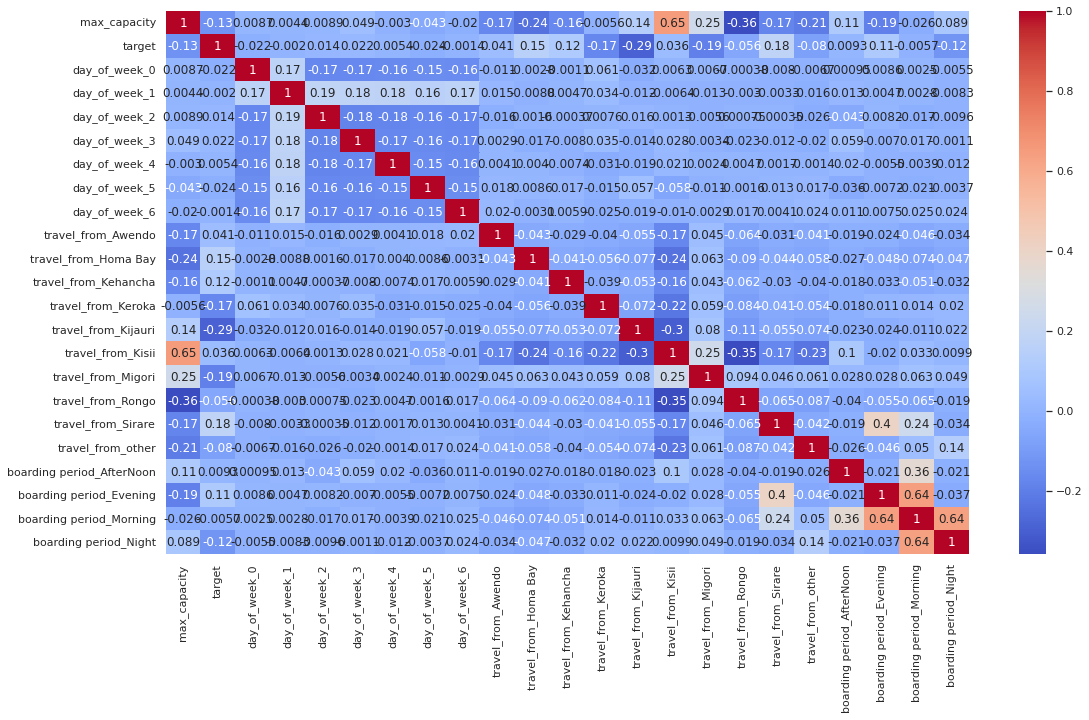

In [195]:
plt.figure(figsize=(18,10))
sns.heatmap(final_df.apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1),cmap='coolwarm',annot=True)
plt.show()

**Finding:** As month and quarter are highly correlated hence dropping month from the dataset

**Outlier Detection and distribution of Target variable**

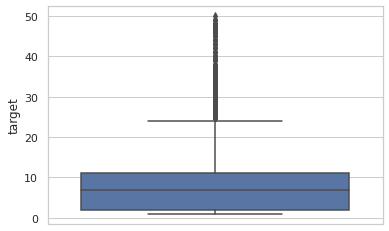

In [196]:
#boxplot for detecting outlier
sns.boxplot(y=final_df['target'])

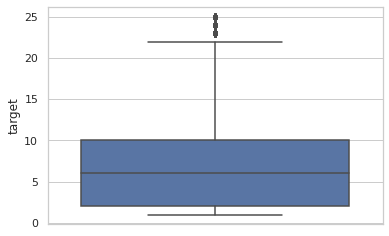

In [197]:
#removing outliers
final_df.drop(index=final_df[final_df['target']>25].index,axis=0,inplace=True)
sns.boxplot(y=final_df['target'])


In [198]:
final_df.shape

(5856, 23)

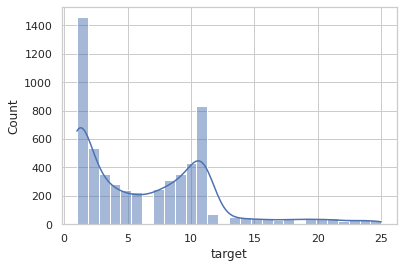

In [199]:
sns.histplot(final_df['target'],kde=True)

In [200]:
#skew measument of target variable
from scipy.stats import skew
from scipy import stats
print(skew(final_df['target']))

0.985818925153979


In [201]:
# final_df['transformed_target'] = stats.boxcox(final_df['target'])[0]
from scipy.special import boxcox, inv_boxcox
final_df['transformed_target'] = np.log(final_df['target'])
# inv_boxcox(y, 2.5)



-0.2839822828080981


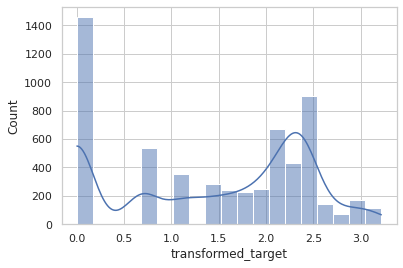

In [202]:
sns.histplot(final_df['transformed_target'],kde=True)
print(skew(final_df['transformed_target']))

In [203]:
#drop target feature from final_df
final_df.drop(['target'],axis=1,inplace=True)

In [204]:
final_df.head()
final_df.columns

Index(['max_capacity', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Keroka', 'travel_from_Kijauri', 'travel_from_Kisii',
       'travel_from_Migori', 'travel_from_Rongo', 'travel_from_Sirare',
       'travel_from_other', 'boarding period_AfterNoon',
       'boarding period_Evening', 'boarding period_Morning',
       'boarding period_Night', 'transformed_target'],
      dtype='object')

**Breaking the dataset into predictor and target variable**

In [205]:
X = final_df[[i for i in final_df.columns if i not in ['transformed_target']]]
Y = final_df['transformed_target']

In [207]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
# transform data
scaled_X = scaler.fit_transform(X)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,Y,test_size=0.2,random_state=7)

In [209]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression()
reg.fit(X_train , y_train)
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

In [210]:
print('-----------Mean Squared Error------------')
print('Training Data Set mean square error is: {}'.format(mean_squared_error(inv_boxcox(y_train,0.21),inv_boxcox(pred_train,0.21))))
print('Test Data Set mean sqaure error is {}'.format(mean_squared_error(inv_boxcox(y_test,0.21),inv_boxcox(pred_test,0.21))))
print('-----------------------------------------')
print('-----------Root Mean Squared Error----------')
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
print('Training Data Set rmse is {}'.format(rmse_train))
print('Test Data Set rmse is {}'.format(rmse_test))
print('--------------------------------------------')
print('--------------r2_Score---------------------')
print('r2_score for training dataset is {}'.format(r2_score(inv_boxcox(y_train,0.21),inv_boxcox(pred_train,0.21))))
print('r2_score for test dataset is {}'.format(r2_score(inv_boxcox(y_test,0.21),inv_boxcox(pred_test,0.21))))

-----------Mean Squared Error------------
Training Data Set mean square error is: 6.359124545845038
Test Data Set mean sqaure error is 6.778759481767489
-----------------------------------------
-----------Root Mean Squared Error----------
Training Data Set rmse is 0.8920798517647176
Test Data Set rmse is 0.8951865524617096
--------------------------------------------
--------------r2_Score---------------------
r2_score for training dataset is 0.17873876632166863
r2_score for test dataset is 0.15285444826928607


In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
train_preds =  g_search.predict(X_train)
test_preds  = g_search.predict(X_test)

In [ ]:
# Obtain accuracy on train set
r2_score(y_train,train_preds)

0.37563956956560285

In [ ]:
# Obtain accuracy on test set
r2_score(y_test,test_preds)

0.28898191444649746